# Multi-layer perceptron

In [5]:
import numpy as np
import pandas as pd
import polars as pl
import torch
from torch import nn

from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset

In [20]:
import MLP_modules
from MLP_modules import MLP, train, plot_losses

# Dataset

В модуле MLP мы реализовали сам класс многослойного перцептрона, функцию для отрисовки графиков лосса и accuracy и функцию для обучения данной на вход модели. Теперь подгрузим нужный нам датасет MNIST и преобразуем его в подходящий для работы модели формат

In [8]:
train_set = MNIST('.MNIST', train=True, transform = T.ToTensor(), download=True)
test_set = MNIST('.MNIST', train=False, transform = T.ToTensor(), download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.9MB/s]


In [9]:
train_set.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### Обозначим для модели необходимык размерности и число эпох, а также алгоритм оптимизации и loss

In [15]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCHS = 10

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_loader = DataLoader(train_set, batch_size=64, shuffle=True) # здесь у нас 60000 объектов. Каждый объект - картинка 28x28 (тензор 1x28x28) и метка этой картинки
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

model = MLP(in_features = IMG_SIZE**2, hidden_size=HIDDEN_SIZE, num_classes=NUM_CLASSES).to(device)
for i in model.parameters(): # размеры матриц параметров для каждого слоя
  print(i.shape)
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01, momentum=0.9) # задаем вид градиентного спуска для модели
criterion = nn.CrossEntropyLoss() # критерий, по которому будем измерять качество

torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [12]:
for images, labels in train_loader:
  print(images.shape, labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


### Обучим нашу модель и посмотрим на результат

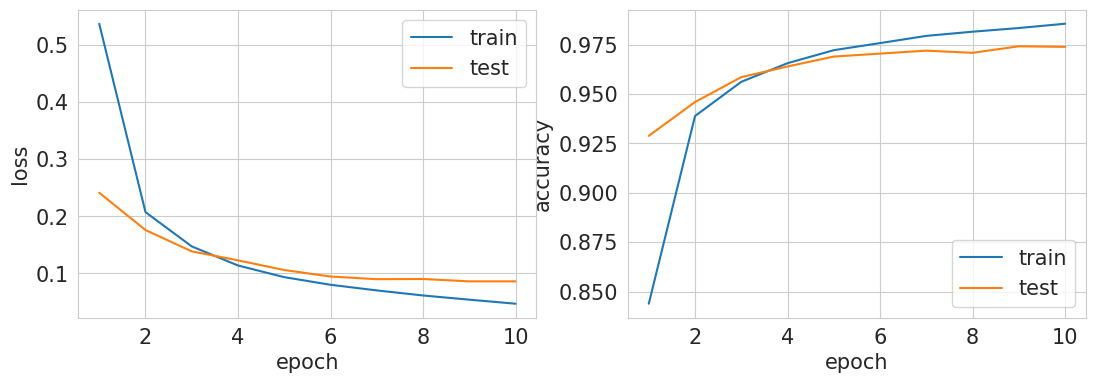

In [16]:
train(model, device, NUM_EPOCHS, optimizer, criterion, train_loader, test_loader)

In [34]:
model.eval()
accuracy_test = 0.0
with torch.no_grad():
  for images, labels in test_set:
    images = images.to(device)
    logits = model(torch.flatten(images, start_dim=1))
    accuracy_test+=(sum(logits.argmax(dim=1)==labels).item())
  accuracy_test/=len(test_set)

In [37]:
print(f'Качество на всей тестовой выборке по итогам обучения модели: {accuracy_test*100}%')

Качество на всей тестовой выборке по итогам обучения модели: 97.38%


Модель достигла довольно высокого качества в задаче классификации рукописных цифр, поэтому я считаю данную реализацию архитектуры MLP успешной.